In [4]:
import os
import sys

sys.path.append('../')

import numpy as np
import torch
from matplotlib import pyplot as plt
from scipy.special import ellipe
from torch.fft import fftshift, fft2, ifft2, ifftn, ifftshift

from kwave.ktransducer import kWaveGrid
from utils.reconstruction import wavefront_real, wavefront_fourier

In [5]:
R = 9.8e-3 # Radius to center [m].
v0, v1 = 1511.4, 1553.0 # Background SoS & SoS in tissue [m/s].

In [6]:
Nx, Ny = 560, 560
dx, dy = 4.e-5, 4.e-5
kgrid = kWaveGrid([Nx, Ny], [dx, dy])
x_vec, y_vec = np.meshgrid(kgrid.x_vec.copy(), kgrid.y_vec.copy())

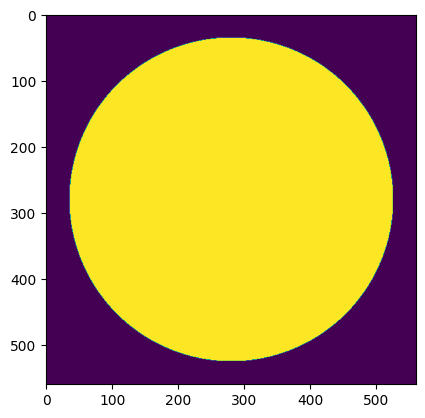

In [7]:
SoS_uniform = np.ones((Ny, Nx)) * v0
SoS_SB = np.ones((Ny, Nx)) * v0
SoS_SB[x_vec**2 + y_vec**2 < R**2] = v1

plt.imshow(SoS_SB)

In [8]:
r = 7e-3 # Distance to center [m].
phi = 3*np.pi/4 # Angle to center [rad].
C0, C1, phi1, C2, phi2 = get_fourier_params(r, phi, R, v0, v1)
print(C0, C1, C2)
w_fourier = wavefront_fourier(C0, C1, phi, C2, phi)
w_real = wavefront_real(R, r, phi, v0, v1)

NameError: name 'get_fourier_params' is not defined

In [ ]:
plt.figure(figsize=(15,9))
for i, SoS in enumerate([SoS_uniform, SoS_SB, SoS_SB, SoS_SB, SoS_SB]):
    w_real = wavefront_real(R, r, phi, v0, v1)
    
    plt.subplot(4, 5, i+1)
    plt.imshow(SoS)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('Speed of Sound', fontsize=14)
        plt.title('Uniform SoS')
    elif i == 1:
        plt.title('Single-body SoS')
    elif i == 2:
        plt.title('Single-body + Vertebral column')
    elif i == 3:
        plt.title('Single-body + Liver')
    elif i == 4:
        plt.title('Numerical Phantom')
    
    plt.subplot(4, 5, i+6)
    plt.plot(theta1D, w_real(theta1D), color='tab:red', label='Real')
    if i == 0:
        plt.ylabel('Wavefront', fontsize=14)

    plt.subplot(4, 5, i+11)
    plt.imshow(PSF(theta2D, k2D, w_real, 0))
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('PSF\n(delay=0mm)', fontsize=14)
    
    plt.subplot(4, 5, i+16)
    plt.imshow(PSF(theta2D, k2D, w_real, 3e-4))
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('PSF\n(delay=0.3mm)', fontsize=14)